In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../data/interim/train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1) #drop unwanted columns

In [5]:
categorical = ['Sex','Embarked']

In [6]:
le = LabelEncoder()
for cat in categorical:
    df[cat].fillna('NaN', inplace=True)
    df[cat] = le.fit_transform(df[cat])
    
    

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,3
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,3
4,1,1,0,35.0,1,0,53.1000,3
5,0,3,1,35.0,0,0,8.0500,3


In [8]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# Imputing Missing Values
[Classification of missing data](https://www.r-bloggers.com/imputing-missing-data-with-r-mice-package/)
 - MCAR: missing completely at random. this is the desirable case.
 - MNAR: missing not completly at random. In this case it may be wise to check the data gathering process further and try to understand why the information is missing. 
Recommended maximum threshold for missing data is about 5% for total of large datasets. 

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

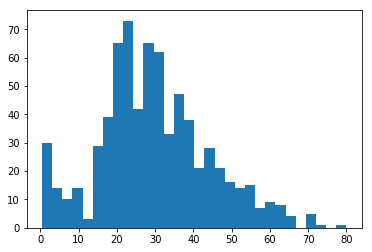

In [9]:
plt.hist(df['Age'].dropna(),bins=30)

Age is right-skewed and looks bimodal. this would make sense if there were mostly families with infants on the ship. This also means that imputing missing values with the mean or median may not be the best choice. uPython has `fancyimpute` which is, well, a bit too fancy for my liking. I think `df.interpolate()` with the default linear setting should do the trick

Yup, after interpolating the distribution looks about the same 

(array([33., 14., 11., 17.,  8., 35., 50., 75., 82., 65., 83., 81., 46.,
        63., 51., 28., 34., 25., 21., 15., 16.,  9.,  9.,  8.,  5.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

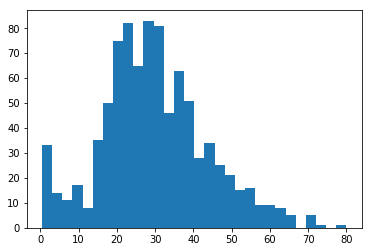

In [10]:
plt.hist(df['Age'].interpolate(),bins=30)

This is NOT the case had we filled in missing values with the median! the data is now seriously screwed and skewed 

(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42., 242.,
         62.,  33.,  47.,  38.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   8.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

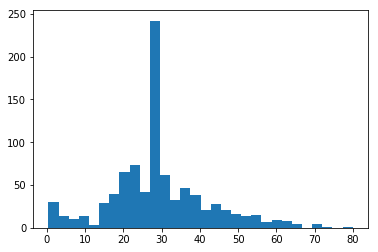

In [11]:
plt.hist(df['Age'].fillna(df['Age'].median()), bins=30)

Use `scipy.stats.skew` to quantify skew. Looks like quite a lot

In [12]:
from scipy.stats import skew 
skew(df['Age'].dropna())

0.3882898514698657

In [13]:
skew(df['Age'].interpolate())

0.36465281377556413

In [14]:
df['Age'] = df['Age'].interpolate()

In [15]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [16]:
df.reset_index().to_feather('../data/interim/titanic_numerical_train')